In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/processed_raw_data/data.csv')
df.shape

(229277, 22)

In [3]:
df = df[pd.to_numeric(df['Sr.No.'], errors='coerce').notnull()]
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [4]:
final_cols = ['Land Area','Longitude', 'Latitude', 'pH', 'EC', 'OC', 
              'N', 'P', 'K', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B', 'region','state']
df = df[final_cols]

In [5]:
for col in ['pH', 'EC', 'OC','N', 'P', 'K', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B']:
    df[col] = df[col].str.split('\s+').str[0].astype(float)
# dff['N']=dff['N'].str.split('\s+').str[0].astype(float)
# dff['P']=dff['P'].str.split('\s+').str[0].astype(float)
# dff['K']=dff['K'].str.split('\s+').str[0].astype(float)

In [6]:
df = df[(df['Longitude']>=67) & (df['Longitude']<=98) & (df['Latitude']>=8) & (df['Latitude']<=38)]

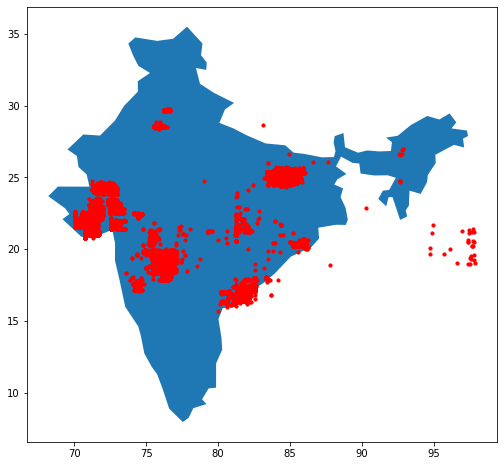

In [7]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world['name']=='India']
gdf.plot(ax=world.plot(figsize=(10, 8)), marker='o', color='red', markersize=10)

In [8]:
corr = df.corr()
corr

,Land Area,Longitude,Latitude,pH,EC,OC,N,P,K,S,Zn,Fe,Cu,Mn,B
Land Area,1.000000,0.006145,0.017334,-0.001472,0.045867,0.006741,0.003088,0.003621,-0.011594,0.004327,0.000831,-0.001314,0.002708,-0.003058,0.000097
Longitude,0.006145,1.000000,0.284811,-0.341214,-0.032708,-0.236852,0.073694,0.038763,-0.195926,-0.038488,0.003796,0.162478,0.043274,-0.084048,-0.116883
Latitude,0.017334,0.284811,1.000000,0.031404,0.032770,-0.010918,0.261814,0.064535,-0.171747,-0.114359,0.013511,-0.068329,-0.081958,-0.092633,-0.032700
pH,-0.001472,-0.341214,0.031404,1.000000,0.064446,0.091671,0.135289,-0.003130,0.092365,0.096159,0.002288,-0.044221,-0.003679,0.085898,0.088197
EC,0.045867,-0.032708,0.032770,0.064446,1.000000,-0.002076,0.124488,-0.001699,-0.008137,0.066736,0.016884,0.014817,0.034294,0.007955,-0.009665
OC,0.006741,-0.236852,-0.010918,0.091671,-0.002076,1.000000,0.359603,0.008382,0.018886,0.047232,-0.008559,-0.060150,-0.037487,-0.038617,0.021509
N,0.003088,0.073694,0.261814,0.135289,0.124488,0.359603,1.000000,0.023680,-0.021823,-0.032495,0.012483,0.019549,-0.025202,0.000600,-0.047574
P,0.003621,0.038763,0.064535,-0.003130,-0.001699,0.008382,0.023680,1.000000,0.011913,0.034051,0.007479,0.027866,0.006339,0.012006,0.006056
K,-0.011594,-0.195926,-0.171747,0.092365,-0.008137,0.018886,-0.021823,0.011913,1.000000,-0.025720,-0.005932,0.008476,0.035015,0.161244,0.037116
S,0.004327,-0.038488,-0.114359,0.096159,0.066736,0.047232,-0.032495,0.034051,-0.025720,1.000000,0.030696,0.083765,0.023555,0.042342,0.035466


<AxesSubplot:>

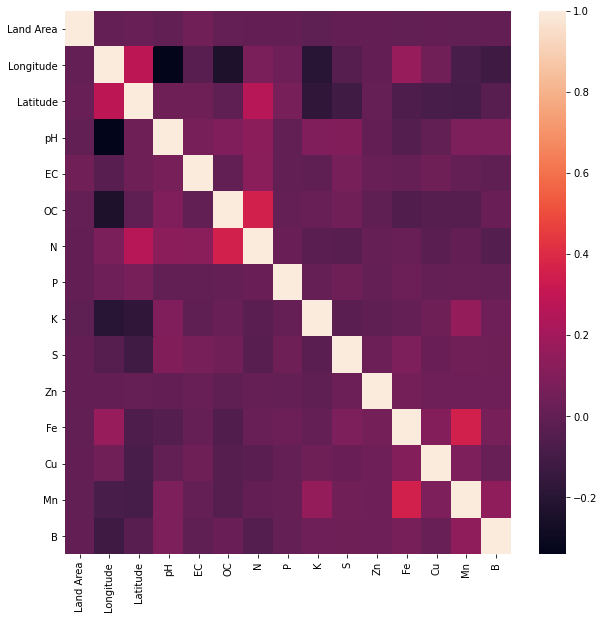

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, fmt='.2g',linewidths=0)

In [10]:
df.columns
final_cols = ['Longitude', 'Latitude', 'OC', 'N', 'P', 'K']

In [71]:
df = df[final_cols]

In [74]:
df.reset_index(drop=True, inplace=True)

In [78]:
df.drop_duplicates(inplace=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<AxesSubplot:>

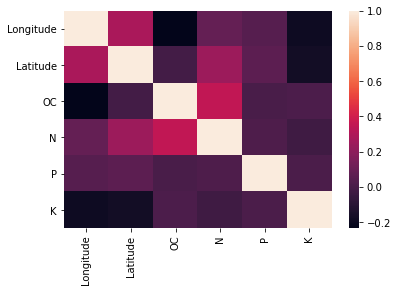

In [80]:
sns.heatmap(df.corr(), fmt='.2g',linewidths=0)